In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import torch
import os
from pathlib import Path

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f'Device: {device}')

data_folder = Path("../../data")

# Necessary for notebook to see src package
import sys
sys.path.append('../..')

Device: cuda


# Load The Dataset

In [8]:
loan_dataset_path = data_folder / 'Loan.csv'
loan_dataset = pd.read_csv(loan_dataset_path)

dataset = loan_dataset.copy(deep=True)

# General Info

In [9]:
# No Null Values

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [10]:
# Drop the id column 

dataset.drop(columns=['ID'], inplace=True)

dataset.head(20)

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [ ]:
# Get the cardinality

n_unique = dataset.nunique()

cardinality = pd.DataFrame(
    data={
        'Feature': n_unique.index,
        'Cardinality': n_unique.values
    }
)

# Family, Personal Loan, Securities Account, CD Account, Online and Credit Card columns are discrete columns

display(cardinality.style.hide(axis='index'))

Feature,Cardinality
Age,45
Experience,47
Income,162
ZIP Code,467
Family,4
CCAvg,108
Education,3
Mortgage,347
Personal Loan,2
Securities Account,2


In [27]:
discrete_columns = [col for col in dataset.columns if dataset[col].nunique() < 10]
continuous_columns = [col for col in dataset.columns if col not in discrete_columns]

print(discrete_columns)
print(continuous_columns)

['Family', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
['Age', 'Experience', 'Income', 'ZIP Code', 'CCAvg', 'Mortgage']


# Continous Features

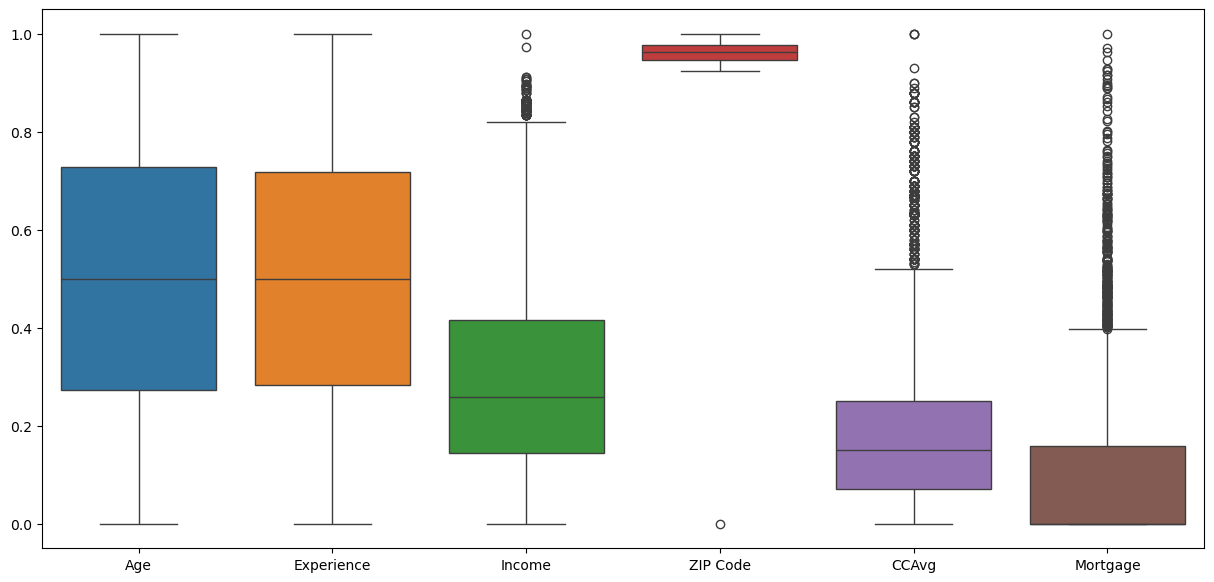

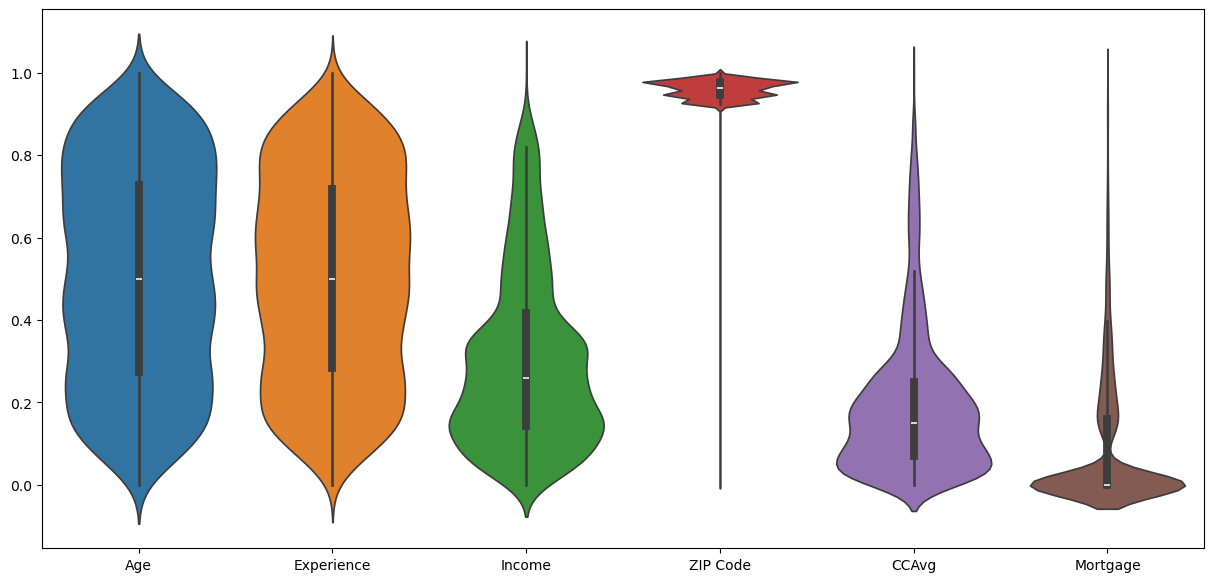

In [79]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.set_output(transform='pandas')

scaled_data = scaler.fit_transform(dataset[continuous_columns])

plt.figure(figsize=(15, 7))
sns.boxplot(data=scaled_data)
# sns.stripplot(data=scaled_data, jitter=False, color='k', alpha=0.6, size=6)

plt.show()

plt.figure(figsize=(15, 7))
sns.violinplot(
    data=scaled_data,
    inner='box',
    density_norm='area',
)
plt.show()


# Discrete Features

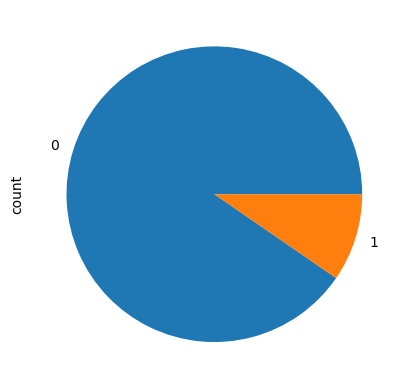

In [92]:
dataset['Personal Loan'].value_counts().plot.pie()
plt.show()